In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the dataset
def read_dataset(path):
    df = pd.read_csv(path, sep=",")
    return df

In [3]:
root_path = 'dataset/JC-20162-citibike-tripdata.csv'
root_df = read_dataset(root_path)

In [4]:
#get shape information
root_df.shape

(8250, 15)

In [8]:
root_df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,361,2016-02-01 00:31:18,2016-02-01 00:37:19,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24393,Subscriber,1975.0,1
1,297,2016-02-01 01:55:05,2016-02-01 02:00:02,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24394,Subscriber,1985.0,2
2,1155,2016-02-01 02:40:05,2016-02-01 02:59:20,3183,Exchange Place,40.716247,-74.033459,3210,Pershing Field,40.742677,-74.051789,24676,Subscriber,1976.0,1
3,1769,2016-02-01 05:11:28,2016-02-01 05:40:58,3214,Essex Light Rail,40.712774,-74.036486,3203,Hamilton Park,40.727596,-74.044247,24700,Subscriber,1974.0,2
4,935,2016-02-01 05:48:24,2016-02-01 06:03:59,3203,Hamilton Park,40.727596,-74.044247,3214,Essex Light Rail,40.712774,-74.036486,24639,Subscriber,1974.0,2


### Problem we are trying to achieve ###

1. Peak usage demography - User persona/characteristics
2. Peak demand rushhours, day wise and seasonality
3. Demand planning, rebalancing and resource allocation

### Basic Checking in Dataset ###

In [5]:
#any other basic information will be added in this function
def basic_information(df):
    #information
    df_describe = df.info() #give information about dataset
    df_dataexp = df.describe() #descrive basic statistics
    
    return df_describe, df_dataexp

In [6]:
info, describe = basic_information(root_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 15 columns):
Trip Duration              8250 non-null int64
Start Time                 8250 non-null object
Stop Time                  8250 non-null object
Start Station ID           8250 non-null int64
Start Station Name         8250 non-null object
Start Station Latitude     8250 non-null float64
Start Station Longitude    8250 non-null float64
End Station ID             8250 non-null int64
End Station Name           8250 non-null object
End Station Latitude       8250 non-null float64
End Station Longitude      8250 non-null float64
Bike ID                    8250 non-null int64
User Type                  8250 non-null object
Birth Year                 7920 non-null float64
Gender                     8250 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 966.9+ KB


There are some missing value in the Birth Year column apart from that every data is fully filled with proper data types. Here, in this dataset **Start Time, Stop Time** and some other columns are in string type but we don't be needing this column while modelling because we have other features that are directly derived from this features.

For example,

Trip Duration = Stop Time - Start Time

### Data Understanding and Explanation ###

1. Trip Duration (seconds) — Self explanatory
2. Start Time and Date - Self explanatory
3. Stop Time and Date - Self explanatory
4. Start Station Name - Self explanatory
5. End Station Name - Self explanatory
6. Station ID - Unique identifier for each station
7. Station Lat/Long - Coordinates
8. Bike ID - unique identifier for each bike
9. User Type (Customer = 24-hour pass or 3-day pass user;  Subscriber = Annual Member) - Customers are usually tourists, subscribers are usually NYC residents
10. Gender (Zero=unknown; 1=male; 2=female) - Usually unknown for customers since they often sign up at a kiosk
11. Year of Birth - Self entered, not validated by an ID.

In [7]:
describe

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,7920.000000,8250.000000
mean,1.424132e+03,3199.026545,40.724150,-74.047442,3194.315758,40.723410,-74.046607,24542.274061,1978.872980,1.156485
std,4.005195e+04,11.011225,0.008149,0.011322,96.201275,0.007980,0.011551,190.078052,9.535097,0.462561
min,6.100000e+01,3183.000000,40.697030,-74.096937,225.000000,40.697030,-74.096937,14632.000000,1947.000000,0.000000
25%,2.380000e+02,3187.000000,40.718489,-74.051789,3186.000000,40.718489,-74.050656,24453.000000,1974.000000,1.000000
50%,3.610000e+02,3199.000000,40.724176,-74.044247,3195.000000,40.721525,-74.043991,24555.000000,1981.000000,1.000000
75%,5.900000e+02,3209.000000,40.727596,-74.038051,3207.000000,40.727596,-74.036486,24636.000000,1986.000000,1.000000
max,2.104123e+06,3225.000000,40.752559,-74.032108,3225.000000,40.752559,-73.990697,24724.000000,1999.000000,2.000000


### Few Basic Analysis  ###

1. User Type analysis
2. Most Popular trips
3. Most demanded Bike
4. Station analysis
5. Peak demand hours, seasonaility function

In [144]:
#setting figure size for whole notebook
%matplotlib inline
font = {
    'family':'normal',
    'weight':'bold',
    'size':15
}

plt.rcParams["figure.figsize"] = [20, 10]
plt.rc('font', **font)

In [145]:
def plot_bar_diagram(df, label_df=None, x_axis=None, y_axis=None,
                     filename=None):
    
    #zip it and convert into dictionary
    label = dict(zip(label_df['Station ID'], label_df['Station Name']))
    df['Station Name'] = df['Station ID'].apply(lambda x: label[x])
    
    ax = df.plot.bar(x='Station Name', y='Frequency')
    plt.show()
    plt.close()

In [146]:
def station_analysis(df):
    
    #get the frequency of start_station and end_station
    start_station = pd.DataFrame(df['Start Station ID'].value_counts()).reset_index()
    end_station = pd.DataFrame(df['End Station ID'].value_counts()).reset_index()
    
    start_station.columns = ['Station ID', 'Frequency']
    end_station.columns = ['Station ID', 'Frequency']
    
    #get the name for plotting
    st_label = df[['Start Station ID', 'Start Station Name']].drop_duplicates(subset=None, keep='first', inplace=False)
    end_label = df[['End Station ID', 'End Station Name']].drop_duplicates(subset=None, keep='first', inplace=False)
    
    #rename columns for feature use
    #so, while plotting we don't get any errors
    rename_cols = ['Station ID',  'Station Name']
    
    st_label.columns = rename_cols
    end_label.columns = rename_cols
    
    start_station_diagram = plot_bar_diagram(start_station, st_label,
                x_axis='start_station', y_axis='frequency', filename='station_trip_analysis')
    
    end_station_diagram = plot_bar_diagram(end_station, end_label,
                x_axis='End_Station', y_axis='frequency', filename='end_station_trip_analysis')
    

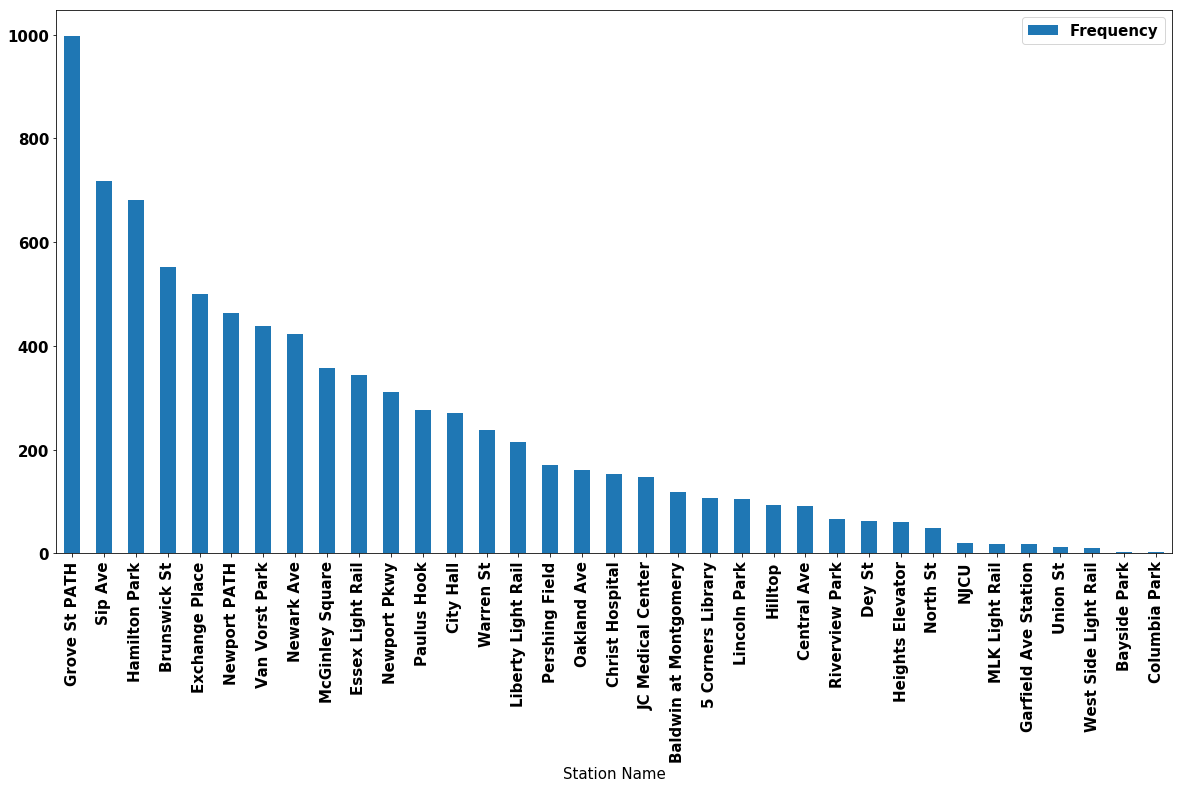

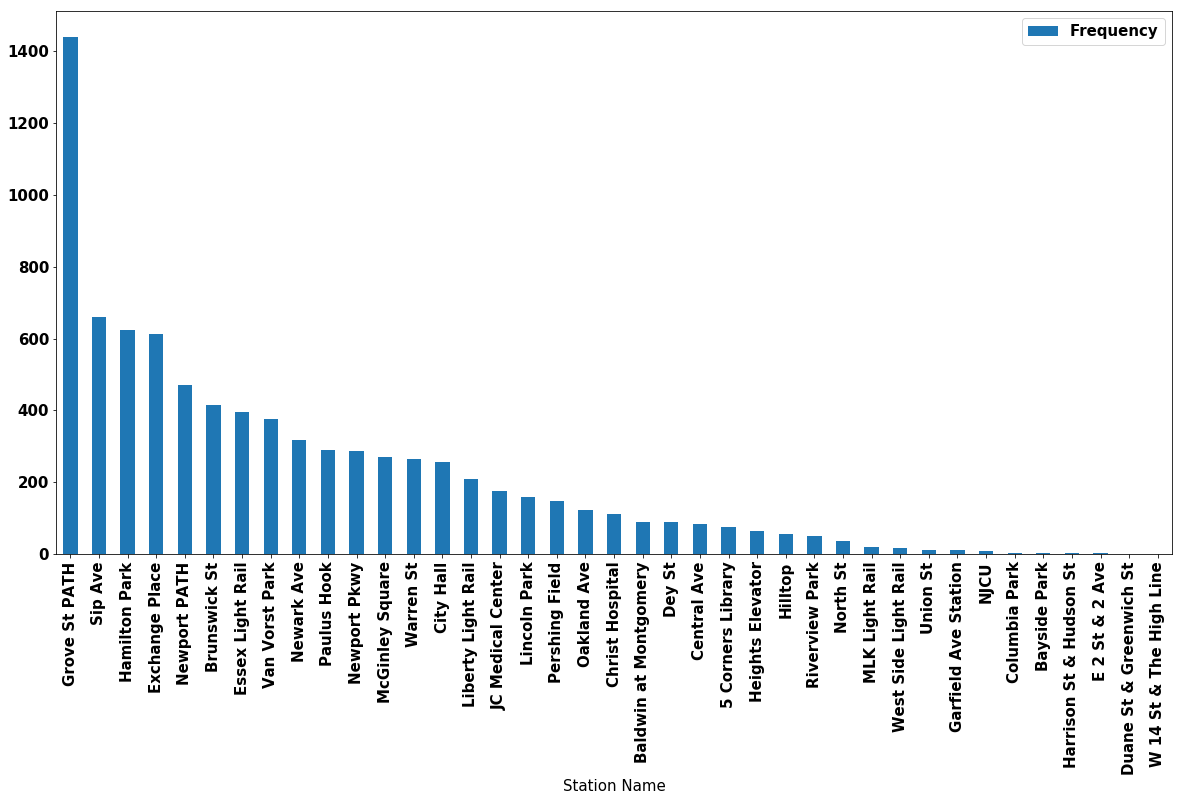

In [147]:
station_analysis(root_df)

From above diagram, top 5 citi bike stations by number of starts and end trips.

**Top 6 Start Trips**
1. Grove St PATH
2. Sip Ave
3. Hamilton Park
4. Brunswick St
5. Exchange Place
6. Newport  PATH

**Top 6 End Trips**
1. Grove St PATH
2. Sip Ave
3. Hamilton Park
4. Exchange Place
5. Newport PATH
6. Brunswick St

In [151]:
## let's check what type of customer goes to this place, whether
## subscriber or customer.
def absorb_customer_type(df, key):
    gby_station = df.groupby([key, 'User Type']).size().unstack(fill_value=0)
    return gby_station

In [152]:
st_ct_observation = absorb_customer_type(root_df, key='Start Station Name')
et_ct_observation = absorb_customer_type(root_df, key='End Station Name')

In [153]:
st_ct_observation

User Type,Customer,Subscriber
Start Station Name,,
5 Corners Library,6,100
Baldwin at Montgomery,5,113
Bayside Park,1,2
Brunswick St,7,545
Central Ave,1,90
Christ Hospital,3,150
City Hall,13,257
Columbia Park,1,2
Dey St,5,58


In [154]:
et_ct_observation

User Type,Customer,Subscriber
End Station Name,,
5 Corners Library,3,73
Baldwin at Montgomery,6,85
Bayside Park,1,2
Brunswick St,8,406
Central Ave,3,80
Christ Hospital,2,111
City Hall,10,246
Columbia Park,1,4
Dey St,2,88


From above two observation, we came to know that almost all station subscribers dominates the count more than the customers which is obvious that home city people use the service more often than the tourists.

### Average Trip Duration ###

we need to check average trip duration because, when we count total number of trips, subscriber will dominate which is obvious but our goal is to find the User Type who uses this service for long trips. 

In [167]:
def average_trip_duration(df):
    trip_gby = df.groupby('User Type')['Trip Duration'].mean()
    return trip_gby

In [168]:
average_trip_duration(root_df)

User Type
Customer      2664.639394
Subscriber    1372.444192
Name: Trip Duration, dtype: float64

### Observation ###
Sure, in this dataset there are some anamolies. If we inspect more Starting point = 'Essex Light Rail' and Ending Point = 'Exchange Place' roughly take 30 minutes(checked on Google maps, not sure about if its real). But in the data it shows that the trip continued for 24 days. 

In [236]:
def find_outlier(df):
    
    #finding the interquanitle range
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3 - q1 
    
    df_out = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    
    return df_out
    
def box_plot(df):
    #trip duration in min
    df['trip_in_min'] = df['Trip Duration'].apply(lambda x: x/60)
    
    #subscriber outlier
    subscriber_df = find_outlier(df[df['User Type']=='Subscriber'])
    customer_df = find_outlier(df[df['User Type']=='Customer'])
    
    #after outlier
    after_outlier_df = pd.concat([subscriber_df, customer_df], axis=0)
    
    fig, ax = plt.subplots()
    after_outlier_df.boxplot(column=['trip_in_min'], by='User Type', ax=ax)
    
    #avergae
    avg = after_outlier_df.groupby('User Type')['trip_in_min'].mean()
    print("Average Minutes Travelled:{}".format(avg))
    
    plt.show()

Average Minutes Travelled:User Type
Customer      18.701781
Subscriber     5.730796
Name: trip_in_min, dtype: float64


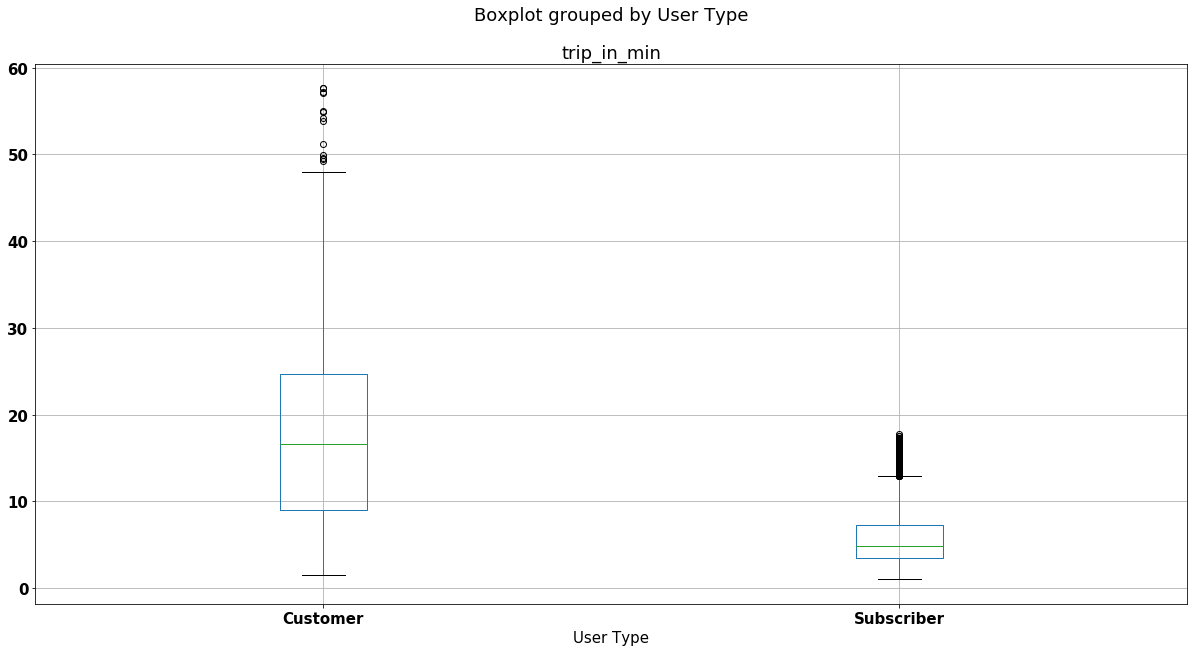

In [237]:
box_plot(root_df)

NOTE - It's safe to say that **User Type** will be strong predictor of trip duration. 

### Peak Usage - Location ###

In [241]:
trips_df = root_df.groupby(['Start Station Name','End Station Name']).size().reset_index(name='Number of Trips').sort_values(by='Number of Trips', ascending=False)
trips_df['Trip'] = trips_df['Start Station Name'] + "-" + trips_df['End Station Name']

In [250]:
trips_df = trips_df.iloc[:20]

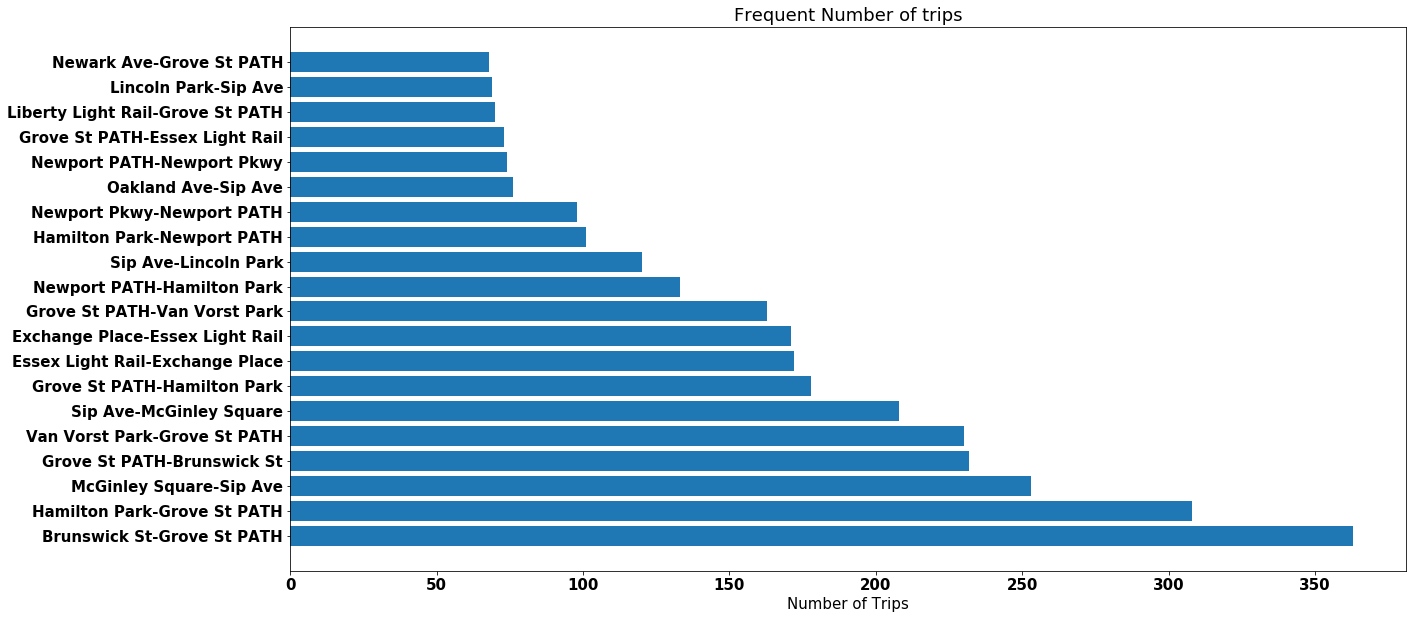

In [254]:
fig, ax = plt.subplots()
ax.barh(tuple(trips_df['Trip']), trips_df['Number of Trips'].to_list(), align='center')
ax.set_yticklabels(trips_df['Trip'])
ax.set_xlabel("Number of Trips")
ax.set_title("Frequent Number of trips")
plt.show()

Top 20 trips w.r.t to geographic location. It obeys the fact, that large number of people takes bike from Brunswick - Grove St Path, Hamilton Park-Grove St Path which comes under top 6 place for start and end trip.

### Check User Behaviour ###

Rider Performance by Gender and Age.

From the dataset, for column "Birth year" only 4% of data is missing. So, filling those dates with median with rest of 96% of data as sample.

According to the data, people between the age 20 - 72 are using the city bike. At age 72 some senior citizen might still drive a bike, but not likely. It might skew the result. Still, we will go with procedure with flow of the data.

In [4]:
!pip3 install geopy

In [40]:
distance = pd.read_csv("distance.csv", sep=",")
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

def plot_line_chart(df, key, x_axis=None, y_axis=None, filename=None):
    sns.lineplot(data=df, x='age', y=key, hue='Gender')
    plt.title(filename)
    plt.show()
    plt.close()
    
def hist_plot(df, key, x_axis=None, y_axis=None, filename=None):
    df = df.dropna() #dropping duplicates for this case
    sns.distplot(df[key])
    plt.show()
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.close()

def analysis_by_user(df):
    df['trips_in_min'] = df['Trip Duration'].apply(lambda x: x/60)
    #fill the birth year
    df['Birth Year'] = df.groupby(['Gender', 'Start Station ID'])['Birth Year'].transform(lambda x: x.fillna(x.median()))
    #let convert birth year into age
    df['age'] = 2019 - df['Birth Year']
    
    #histogram plot
    hist_plot(df, 'age', x_axis='Age(male and female)', 
              y_axis='frequency', filename='people usage w.r.t age')
    
    print("min age:{}, maximum age:{}".format(df['age'].min(), 
                                             df['age'].max()))
    
    distance_df = pd.concat([df, distance], axis=1)
    
    #speed = (min/mile) and (mile/hr)
    df['mile_hour'] = round(distance_df['distance']/(distance_df['trips_in_min']/60), 2)
    
    #plot line char
    plot_line_chart(df,key='mile_hour',x_axis='age',
                    y_axis='mile/hours', filename='performance based on gender and age')

/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


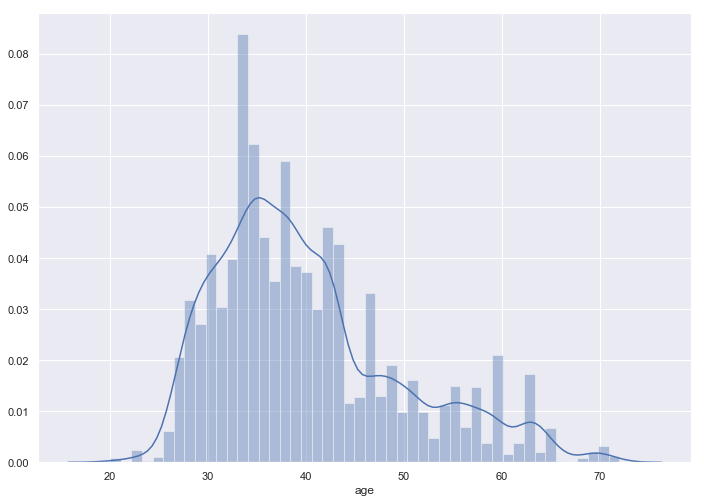

min age:20.0, maximum age:72.0


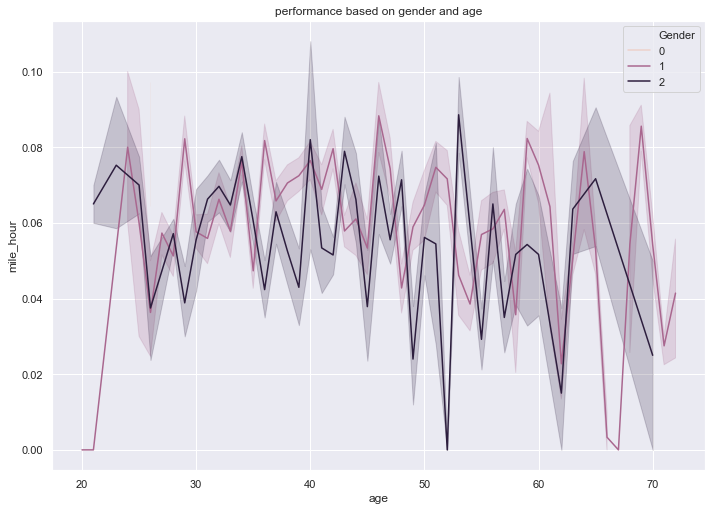

In [41]:
analysis_by_user(root_df)

From the above observation, we come to know that people age 33, 34 uses a city bike more frequently than other aged people. 

### Bike Analysis ###

With simple groupby function we can able to identify what bike is more frequenty take in a trip and sum of minutes its driven. With this maintenance data, this information can be used to identify when a bike will need maintenance and repairs. This can help decrease the problem of broken bikes in dock stations, which we seen as a daily issue. 

### Demand rush hours, day wise and seasonality ###

Modify the data according to the case, where we can we identify demand, rush hours, whether trend is following is some where for each station. 